### A. Exploratory analysis
* Load the dataframe comprising system and human transcribed text.

In [ ]:
import pandas as pd
htrec = pd.read_csv("htrec2022_train.csv"); htrec.sample()

,HUMAN_TRANSCRIPTION,SYSTEM_TRANSCRIPTION,CENTURY,IMAGE_PATH,TEXT_LINE_NUM
1105,"θείων ἀναβαινέτω κατά σπουδήν,","θειῶν, ἀναξαιν επω κατα που δην",15,74 Bodleian-Library-MS-Barocci-59_00079_fol-44...,20


#### A.1 Statistics 
* Measure the number of texts, word occurrences, word types, unique characters, and the average length of the texts in characters, of the human transcriptions.

In [ ]:
#initialize list that contains all texts from HT column
list_of_texts_hr = htrec['HUMAN_TRANSCRIPTION'].tolist()

#measure number of texts/rows
print("The number of texts in HT is", len(list_of_texts_hr))

The number of texts in HT is 1875


In [ ]:
#import nltk 
import nltk
nltk.download('punkt')
from nltk import word_tokenize

#create a new column which contains the texts from HT column "broken" into their tokens
htrec["tokens"] = htrec.HUMAN_TRANSCRIPTION.apply(word_tokenize) 

#get the values from "tokens" column to a list
all_words_list = htrec.tokens.to_list() 

#initialize list that will contain all word occurences
words_occur_list_hr = []

#measure number of word occurences
for l in all_words_list: 
    for w in l:
        words_occur_list_hr.append(w)

print("The number of word occurancies in HT is", len(words_occur_list_hr))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
The number of word occurancies in HT is 13949


In [ ]:
# initialize list that will contain the word types
word_types_list_hr = []

#measure number of word types
for l in words_occur_list_hr:
  if l not in word_types_list_hr: #count each word only once
    word_types_list_hr.append(l)

print("The number of word types in HT is", len(word_types_list_hr))

The number of word types in HT is 5897


In [ ]:
# initialize list that will contain all the unique characters
unique_char_list_hr = [] 

#measure unique characters
for w in words_occur_list_hr:
    for char in w:
        if char not in unique_char_list_hr: #count each character only once
            unique_char_list_hr.append(char)

print("The number of unique characters in HT is",len(unique_char_list_hr))

The number of unique characters in HT is 171


In [ ]:
# initialize list that will contain the length of each text
list_of_no = [] 

#measure average text length in characters
for sentence in list_of_texts_hr:
  len_sen=len(sentence)
  list_of_no.append(len_sen)

#divide the sum of all the text lenghts by the number of the texts and get rounded result
print("The average text length in HT is",round(sum(list_of_no)/len(list_of_texts_hr))) 

The average text length in HT is 40


* Do the same for the system transcriptions. 

In [ ]:
#initialize list that contains all texts from ST column
list_of_texts_sr = htrec['SYSTEM_TRANSCRIPTION'].tolist()

#measure number of texts/rows
print("The number of texts in ST is", len(list_of_texts_sr))

The number of texts in ST is 1875


In [ ]:
#create a new column which contains the texts from ST column "broken" into their tokens
htrec["tokens_sr"] = htrec.SYSTEM_TRANSCRIPTION.apply(word_tokenize)

#get the values from "tokens_sr" column to a list
all_words_list_sr = htrec.tokens_sr.to_list()

#initialize list that will contain all word occurences in ST
words_occur_list_sr = []

#measure word occurences
for l in all_words_list_sr:
    for w in l:
          words_occur_list_sr.append(w)
    
print("The number of word occurances in ST is", len(words_occur_list_sr))

The number of word occurances in ST is 11264


In [ ]:
#initialize list that will contain all word types
word_types_list_sr = []

#measure number of word types
for l in words_occur_list_sr:
  if l not in word_types_list_sr: #count each word only once
    word_types_list_sr.append(l)

print("The number of word types in ST is", len(word_types_list_sr))

The number of word types in ST is 7174


In [ ]:
#initialize list that will contain all unique characters
unique_char_list_sr = []

#measure unique characters
for w in words_occur_list_sr:
    for char in w:
        if char not in unique_char_list_sr: #count each character only once
            unique_char_list_sr.append(char)

print("The number of unique characters in ST is",len(unique_char_list_sr))

The number of unique characters in ST is 82


In [ ]:
# initialize list that will count the length of each text
list_of_no_st = []

#measure average text length in characters
for sentence in list_of_texts_sr:
  len_sen=len(sentence)
  list_of_no_st.append(len_sen)

#divide the sum of all the text lenghts by the number of the texts and get rounded result
print("The average text length in ST is",round(sum(list_of_no_st)/len(list_of_texts_sr)))

The average text length in ST is 37


* Print the characters that the system failed to transcribe (i.e., characters in human- but not in system-transcriptions).

In [ ]:
# initialize list that will contain characters system failed to transcribe
failed_char_sr = []

# find which characters weren't included in ST
for c in unique_char_list_hr:
  if c not in unique_char_list_sr:
    failed_char_sr.append(c)
    
print(failed_char_sr)

['΄', 'ἄ', 'ὖ', 'ὀ', 'Λ', 'Α', 'Μ', 'Ε', ';', 'ῄ', 'ὤ', 'ὦ', 'ἦ', 'Φ', 'ὗ', 'ἥ', 'ᾤ', 'Π', 'ὄ', 'ὕ', 'ὧ', 'ὔ', 'ὃ', 'ὠ', 'Ν', 'ᾶ', 'ἷ', 'ἅ', 'ἣ', 'ῇ', 'ἕ', 'ᾷ', 'Δ', 'Ἑ', 'ᾗ', ';', 'ὣ', 'Ἰ', 'ἂ', 'Ὦ', 'Ἄ', 'ἃ', 'ὓ', 'ἇ', 'Ἅ', 'Η', 'ά', 'έ', 'ῥ', 'ή', 'ί', 'ώ', "'", 'ύ', 'Γ', 'Ω', 'Ξ', 'ϊ', 'Ἡ', 'Ἱ', 'ἧ', 'ᾴ', 'Ἴ', 'Χ', 'Β', 'Ἐ', 'ἳ', 'Σ', 'ᾠ', 'Ἁ', 'ᾑ', 'ᾔ', 'ᾦ', '᾿', 'Ὑ', 'Ὥ', 'ῤ', 'Ὅ', 'Ὡ', 'Ὃ', 'Ῥ', 'ΐ', 'ᾅ', 'ᾄ', 'ῒ', 'Ὠ', 'Ἔ', 'ᾧ', 'Ζ']


* Also, print the ones that exist in both and search for any visible patterns. 

In [ ]:
# initialize list that will contain characters the system transcribed
found_char_sr = []

# find which characters exist both in HT & ST
for c in unique_char_list_sr:
  if c in unique_char_list_hr:
    found_char_sr.append(c)

print(found_char_sr)

['ἐ', 'γ', 'ε', 'ν', 'ο', 'μ', 'α', 'π', 'δ', 'η', 'σ', 'ω', 'τ', 'ς', 'ἀ', 'λ', 'ῆ', 'κ', 'ι', 'υ', 'β', 'ὺ', 'θ', 'χ', 'ρ', 'ό', 'ζ', 'ῶ', 'ὅ', 'ξ', 'ί', 'ὴ', 'έ', 'ὰ', ',', 'ῦ', 'ώ', 'ὶ', 'ὲ', 'ή', 'ὑ', 'ύ', 'φ', 'ά', 'ῴ', 'ὐ', 'ψ', 'ἡ', 'ὁ', 'ἔ', 'ὡ', 'ῖ', 'ῷ', 'ὸ', '·', 'ἰ', 'ῳ', '.', 'Τ', 'ἵ', 'ἢ', '᾽', 'ἤ', 'ἑ', 'ἁ', 'ὼ', 'ὥ', 'Ἀ', '·', 'ἶ', 'Ο', 'ἴ', 'Ἕ', 'Θ', 'ἱ', 'Κ', 'ῃ', 'ὢ', 'ἠ', 'Ὁ', 'ᾳ', 'ό']


**Comments**
*    System failed to transcribe most capital letters.
*    System failed to transcribe more "complex" characters(e.g.'ᾗ', 'ᾧ', 'ΐ'). Especially when there is a combination of δασεία/ψιλή + περισπωμένη.
*    System couldn't detect δασεία/ψιλή above the consonant letter 'ρ'.
* System had no problem transcribing lowercase consonants.
*    System had no problem transcribing vowels without intonation or vowels with "more simple" intonation.
* System couldn't transcribe some punctuation (e.g. ';', "'")

* What kind of words did the system mistakenly transcribed (i.e., ones in system-transcriptions but not in human-transcriptions)?

In [ ]:
# initialize list that will contain words that don't exist in HT
failed_w_sr = []

# find which words weren't in the HT, therefore they were mistakenly transcribed by the system
for w in words_occur_list_sr:
  if w not in words_occur_list_hr:
    failed_w_sr.append(w)

print(failed_w_sr)

['ἐγγενομεναπαδημησμεννωτες', 'ἀλλατῆε', 'κλησει', 'β', 'καλεαυτοὺς', 'πολλαγινεσθαι', 'συγχωρ', 'όν', 'εμπυριζου', 'σιμαμπελῶνα', 'ἀλλακαι', 'ὅδξα', 'ἐδίας', 'πλσον', 'ἐξιας', 'ἐις', 'ἀλ', 'λοτρλων', 'ἐπιθυμιαν', 'προκαλουμένος', 'ἐμπυρι', 'λει', 'αμπέλῶνα', 'συναπτειγὰρ', 'τοκαι', 'καρπα', 'πτωχουεντοις', 'οικοιςχμῶν', 'ωστεκακα', 'ικον', 'αποαρπαγης', 'καιβωας', 'συγεγοντεσ', 'εμπρησμου', 'αμπελωνιπαρεχησι', 'ηρουχυποδειχματος', 'κατατοὺς', 'ετώτας', 'λαουπαντος', 'καταλλης', 'λῶν', 'πλονξιαν', 'παιδοτριβομενου', 'πρεσυν', 'προιον', 'καραρχοντες', 'οιμη', 'διατῆς', 'γγιαι', 'νουσις', 'διδασκαλιας', 'ιιουμει', 'αγαλλων', 'δει', 'γματων', 'αμπεμων', 'αγεωργοῦντες', 'εγλληθησομεθα', 'ευζοιωσδεκαι', 'ακουσομεθα', 'καικαρπεαγη', 'πτωχουεν', 'οικοις', 'χμῶν', 'δαντα', 'ειςλογοντῆς', 'ἀναπαυως', 'πενητω', 'διδόμὲναδεντοις', 'ικοις', 'εχωμεν', 'αποστεροῦντες', 'ἐνδεεις', 'ωτιἀμεις', 'απικεὶ', 'τοη', 'τοπρο', 'ποτω', 'απτω', 'χω', 'ηκατίςχων', 'θος', 'ἀδεκου', 'σικαιἀπόστερου', 'σίη', 'ἐγκαλ

#### A.2 Visualisation

* Plot the frequency of the centuries in the data.

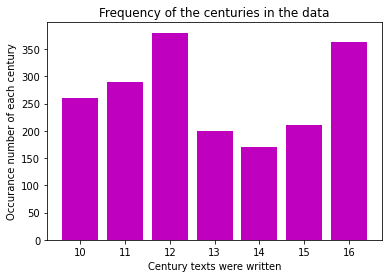

In [ ]:
import matplotlib.pyplot as plt

#get values from 'Century' column to list
list_of_centuries = htrec['CENTURY'].tolist()

#get list containing lists of the frequency each value has in the 'Century' column
#found this here: https://stackoverflow.com/questions/2600191/how-do-i-count-the-occurrences-of-a-list-item
freq_list = pd.Series(list_of_centuries).value_counts().reset_index().values.tolist()

centuries = [] #will contain all centuries, used as X in the plot
frequencies = [] #will contain all frequency values, used as Y in the plot

#In every list contained in the freq_list, the 1st value is the century and the 2nd value is the frequency each century has in the dataframe.
for lists in freq_list:
  centuries.append(lists[0])
  frequencies.append(lists[1])

#create the plot    
plt.bar(centuries, frequencies, linewidth=1.5, color='m')
plt.xlabel("Century texts were written")
plt.ylabel("Occurance number of each century")
plt.title("Frequency of the centuries in the data")
plt.show()

* Plot the frequency of the ten most frequent characters in the system transcriptions.

In [ ]:
#First we must find all the characters the ST contains
#get the tokens of ST to list
st = htrec['tokens_sr'].tolist()

# iniatilize a list which will contain all characters
st_char = []

#add the characters from all ST words in the list
for st_list in st:
  for w in st_list:
    for char in w:
      st_char.append(char)

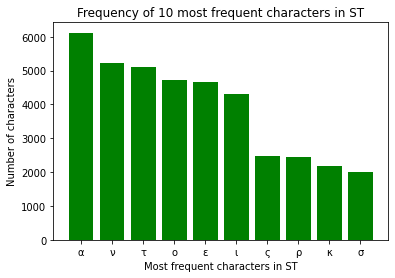

In [ ]:
from collections import Counter

#count the frequency of each character using Counter
freq_d_st = Counter(st_char)
  
mu_chars_st = [] #will contain the most common unique characters of ST, used as X in the plot
mu_chars_freq_st = [] #will contain the frequency of the most common unique characters, used as Y in the plot

#find 10 most common characters and their frequency
for w,f in freq_d_st.most_common(10):
    mu_chars_st.append(w)
    mu_chars_freq_st.append(f)

#create the plot
plt.bar(mu_chars_st, mu_chars_freq_st, linewidth=1.5, color='g')
plt.xlabel("Most frequent characters in ST")
plt.ylabel("Number of characters")
plt.title("Frequency of 10 most frequent characters in ST")
plt.show()

* Plot the frequency of the ten most frequent characters in the human transcriptions.

In [ ]:
#First we must find all the characters the HT contains
#get the tokens of HT to list
ht = htrec['tokens'].tolist()

# iniatilize a list which will contain all characters
ht_char = []

#add the characters from all HT words in the list
for ht_list in ht:
  for w in ht_list:
    for char in w:
      ht_char.append(char)

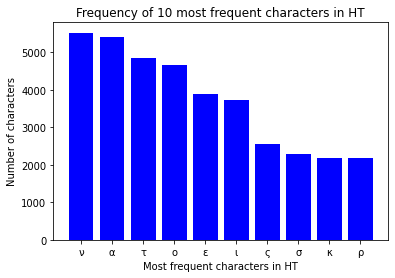

In [ ]:
#count the frequency of each character using Counter
freq_d_ht = Counter(ht_char)

mu_chars_ht = [] #will contain the most common unique characters of HT, used as X in the plot
mu_chars_freq_ht = [] #will contain the frequency of the most common unique characters, used as Y in the plot

#find 10 most common characters and their frequency
for w,f in freq_d_ht.most_common(10):
    mu_chars_ht.append(w)
    mu_chars_freq_ht.append(f)

#create the plot
plt.bar(mu_chars_ht, mu_chars_freq_ht, linewidth=1.5, color='b')
plt.xlabel("Most frequent characters in HT")
plt.ylabel("Number of characters")
plt.title("Frequency of 10 most frequent characters in HT")
plt.show()

* Plot the frequency of the ten most frequent words in the system transcriptions.

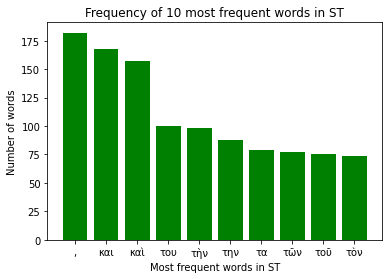

In [ ]:
#count the frequency of each word using Counter
freq_d_st_w = Counter(words_occur_list_sr)

mu_words_st = [] #will contain the most common words of ST, used as X in the plot
mu_words_freq_st = [] #will contain the frequency of the most common words of ST, used as Y in the plot

#find 10 most common words and their frequency
for w,f in freq_d_st_w.most_common(10):
    mu_words_st.append(w)
    mu_words_freq_st.append(f)

#create the plot
plt.bar(mu_words_st, mu_words_freq_st, linewidth=0.5, color='g')
plt.xlabel("Most frequent words in ST")
plt.ylabel("Number of words")
plt.title("Frequency of 10 most frequent words in ST")
plt.show()

* Plot the frequency of the ten most frequent words in human transcriptions.

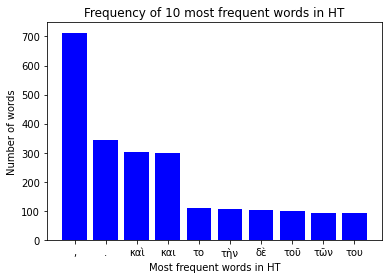

In [ ]:
#count the frequency of each word using Counter
freq_d_ht_w = Counter(words_occur_list_hr)

mu_words_ht = [] #will contain the most common words of HT, used as X in the plot
mu_words_freq_ht = [] #will contain the frequency of the most common words of HT, used as Y in the plot

#find 10 most common words and their frequency
for w,f in freq_d_ht_w.most_common(10):
    mu_words_ht.append(w)
    mu_words_freq_ht.append(f)

#create the plot
plt.bar(mu_words_ht, mu_words_freq_ht, linewidth=0.5, color='b')
plt.xlabel("Most frequent words in HT")
plt.ylabel("Number of words")
plt.title("Frequency of 10 most frequent words in HT")
plt.show()

### B. Error detection


* Using a lexicon of the words of the human transcriptions, you can find unknown words (not in the lexicon) in the transcribed text.
* These are stored into a new column, called `naw` (as in not a word), that holds one list per text.

In [ ]:
htrec_lex = set(htrec.HUMAN_TRANSCRIPTION.str.split().sum())
htrec["naw"] = htrec.SYSTEM_TRANSCRIPTION.apply(lambda x: [w for w in x.split() if w not in htrec_lex])

#### B.1 Error analysis
* Compute the most frequent sources of system error when you focus on frequently mistaken tokens.

In [ ]:
#get values of 'naw' column to list
sys_error = htrec['naw'].tolist()

#initialize list that will contain all mistaken tokens in ST
sys_error_w = [] 

#add the the mistaken tokens to the list
for sys_list in sys_error:
  for w in sys_list:
    sys_error_w.append(w)

#compute 20 most frequently mistaken transcribed tokens
from collections import Counter
sys_error_count = Counter(sys_error_w)
sys_error_count.most_common(30)

[('ς', 28),
 ('τν', 12),
 ('πρ', 10),
 ('κὶ', 10),
 ('δ', 10),
 ('ὸν', 9),
 ('τοφως', 9),
 ('ῶν', 8),
 ('τρ', 7),
 ('καν', 7),
 ('ό', 7),
 ('καριος', 7),
 ('αυτοὺς', 6),
 ('ἀν', 6),
 ('οθε', 6),
 ('αὐτων', 5),
 ('τὴ', 5),
 ('ποις', 5),
 ('π', 5),
 ('περ', 5),
 ('τιν', 5),
 ('εὐ', 5),
 ('ὸ', 5),
 ('εγω', 5),
 ('ὸς', 5),
 ('αὶ', 5),
 ('πν', 5),
 ('οὐτω', 5),
 ('ἀνα', 5),
 ('τοσκοτος', 5)]


**Most frequent error sources in frequently mistaken tokens**

1. no intonation / wrong intonation (e.g. 'αυτοὺς', 'οθε')
2. no spaces between words where there should be (e.g. 'τοφως' instead of 'το φως')
3. missing letters in words (e.g. 'τν' instead of 'την' or 'τον')


* Compute the most frequent sources of system error when focusing on the least frequently mistaken tokens.

In [ ]:
# compute 30 least frequently mistaken transcribed tokens
# found this here: https://www.adamsmith.haus/python/examples/685/collections-list-the-%60n%60-least-common-elements-in-a-counter
n = 30
sys_error_count.most_common()[:-n-1:-1]

[('ελευθερωσηψβοα', 1),
 ('υποαμαρτιων', 1),
 ('ετριν', 1),
 ('οπουγεκαι', 1),
 ('υπεμειμεν', 1),
 ('ειταλλαπαν', 1),
 ('υπεθσαρκα', 1),
 ('μετεραν', 1),
 ('ότιμε', 1),
 ('γενθυγεγονενανος', 1),
 ('ῷδια', 1),
 ('υθυθυ', 1),
 ('ενετερν', 1),
 ('ἀδιουδ', 1),
 ('τυθος', 1),
 ('ογα', 1),
 ('ἐμεμιμειται', 1),
 ('αμινανινην', 1),
 ('ηυσουν', 1),
 ('ευτυς', 1),
 ('αποτης', 1),
 ('ειραγωγων', 1),
 ('τιδε', 1),
 ('στομαμουεσται', 1),
 ('ζιουως', 1),
 ('εξα', 1),
 ('δεξαγων', 1),
 ('εκπροσω', 1),
 ('ρονκερδαναι', 1),
 ('αιμεια', 1)]

**Most frequent error sources in least frequently mistaken tokens**

1. no spacing between words where there should be (e.g. 'υποαμαρτιων' instead of 'υπο αμαρτιων', 'ζιουως' instead of 'ζιου ως')
2. wrong letter transcription/missing letters (e.g. 'ελευθερωσηψβοα' instead of 'ελευθερωση και βοα')
3. no intonation 


#### B.2 Improving error detection 

* Use a better tokenisation from `split` to compute a new lexicon, repeat B.1, and show examples where your change improved (or harmed) the outcome.

Instead of split() I will be using a regex method for splitting based on words and not on whitespaces, which I found here: https://machinelearningmastery.com/clean-text-machine-learning-python/. 

In [ ]:
import re

#get the HT text & split it with regex to create new lexicon
ht = htrec.HUMAN_TRANSCRIPTION.sum()
ht_lex_new = re.split(r'\W+', ht)
ht_lex_new = set(ht_lex_new)

#do the same for ST
st = htrec.SYSTEM_TRANSCRIPTION.sum()
st_tokens = re.split(r'\W+', st)

#initialize list which will contain words system failed to transcribe
st_error = []

#find the wrong words and add them to the list
for w in st_tokens:  
    if w not in ht_lex_new:
        st_error.append(w)

In [ ]:
sys_error_count = Counter(st_error)
sys_error_count.most_common(30)

[('κα', 36),
 ('τος', 19),
 ('κ', 18),
 ('κατα', 17),
 ('α', 15),
 ('ς', 15),
 ('ε', 10),
 ('ται', 10),
 ('πον', 7),
 ('καν', 7),
 ('ῶν', 7),
 ('ὸν', 7),
 ('τν', 7),
 ('συ', 7),
 ('καριος', 7),
 ('αὐτων', 6),
 ('κὶ', 6),
 ('ρ', 6),
 ('ἀνα', 6),
 ('τοφως', 6),
 ('οὐτω', 6),
 ('δημι', 6),
 ('πρ', 5),
 ('ημῶν', 5),
 ('περ', 5),
 ('συν', 5),
 ('ὸ', 5),
 ('μον', 5),
 ('αὶ', 5),
 ('ό', 5)]

**Comments on outcome**

Error drop in tokens:
1. ('τοφως', 9) -> ('τοφως', 6)
2. ('τν', 12) -> ('τν', 7)
3. ('πρ', 10) ->  ('πρ', 5)
4. ('ὸν', 9) ->  ('ὸν', 7)
5. ('κὶ', 10) -> ('κὶ', 6)
6. ('ς', 28) -> ('ς', 15)
7. ('ῶν', 8) ->  ('ῶν', 7)
8. ('δ', 10),('τρ', 7), ('οθε', 6), ('αυτοὺς', 6), ('πν', 5) not included in most common errors anymore

Error rise in tokens:
1. ('οὐτω', 5) -> ('οὐτω', 6)
2. ('ἀνα', 5) -> ('ἀνα', 6)

New errors:
('κα', 36), ('τος', 19), ('κ', 18),  ('α', 15), ('ε', 10), ('ται', 10), ('συ', 7), ('ημῶν', 5), ('ρ', 5)

Overall comments:

* problem with wrong spacing between words seems to have diminished in some cases

* problem with missing intonation is also present here

* less tokens with missing letters

In [ ]:
n = 30
sys_error_count.most_common()[:-n-1:-1]

[('ελευθερωσηψβοα', 1),
 ('υποαμαρτιων', 1),
 ('ετριν', 1),
 ('οπουγεκαι', 1),
 ('υπεμειμεν', 1),
 ('ειταλλαπαντα', 1),
 ('υπεθσαρκα', 1),
 ('μετεραν', 1),
 ('ότιμεγω', 1),
 ('γενθυγεγονενανος', 1),
 ('ῷδια', 1),
 ('υθυθυ', 1),
 ('ενετερνθε', 1),
 ('ἀδιουδ', 1),
 ('τυθος', 1),
 ('ογα', 1),
 ('αμινανινηνἐμεμιμειται', 1),
 ('ηυσουν', 1),
 ('ευτυς', 1),
 ('αποτης', 1),
 ('φησιειραγωγων', 1),
 ('εστινε', 1),
 ('τιδε', 1),
 ('στομαμουεσται', 1),
 ('ζιουως', 1),
 ('εξαα', 1),
 ('δεξαγων', 1),
 ('εκπροσω', 1),
 ('τερονκερδαναι', 1),
 ('αιμεια', 1)]

**Comment**

In least frequent words no change was detected.

### C Error correction

* You are provided with the code that uses edit distance to replace each unknown word with one from a list of known (correct) words.
* As a list of known words, we are using a list created from the human transcriptions.

In [ ]:
! pip install pywer
import pywer
def eddi(tokens, unknown_words, known_words):
    ''' EDDI uses edit distance to replace uknowns tokens with gold ones from a word list 
    :param tokens: the tokenised text in question
    :param unknown_words: the words of the (tokenised) text that are unknown
    :param known_words: a list of known words to use as replacements
    :return: the corrected text
    '''         
    for word in unknown_words:
        idx = tokens.index(word)
        distances = [pywer.cer([ref], [word]) for ref in known_words]
        new_word = known_words[distances.index(min(distances))]
        tokens[idx] = new_word
    return " ".join(tokens)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
htrec["eddited"] = htrec.apply(lambda row: eddi(row.SYSTEM_TRANSCRIPTION.split(), 
                                                row.naw, 
                                                list(htrec_lex)), 
                               axis=1)

* The cell below computes the character error rate between the human transcription and the *corrected* system transcription.

In [ ]:
eddited = htrec.apply(lambda row: pywer.cer([row.HUMAN_TRANSCRIPTION], [row.eddited]), axis=1)
base = htrec.apply(lambda row: pywer.cer([row.SYSTEM_TRANSCRIPTION], [row.eddited]), axis=1)

#### C.1 Evaluating the results
* Report the minimum, the maximum and the mean reduction in character error rate (i.e., error drop).
* Search for rows where this method fails (negative score) and for ones that it suceeds (positive score), attempting to detect weaknesses and strong points.

In [ ]:
#create 2 new columns with the cer 
htrec["error_rate_ht_eddited"] = eddited
htrec["error_rate_st_eddited"] = base 

In [ ]:
#calculate cer and add it in new column
#found the assign method here: https://www.delftstack.com/howto/python-pandas/pandas-subtract-two-columns/
htrec = htrec.assign(cer_ht_st = htrec['error_rate_st_eddited'] - htrec['error_rate_ht_eddited'])

In [ ]:
#min error reduction
print("The minimum reduction in character error rate is",htrec["cer_ht_st"].min(), "with id", htrec["cer_ht_st"].idxmin())

#max error reduction
print("The maximum reduction in character error rate is",htrec["cer_ht_st"].max(), "with id", htrec["cer_ht_st"].idxmax())

#mean error reduction
print("The mean reduction number is", htrec["cer_ht_st"].mean())

The minimum reduction in character error rate is -64.86486486486487 with id 1096
The maximum reduction in character error rate is 29.81366459627329 with id 719
The mean reduction number is -13.625029860248214


**Comment:**

When there are very slight differences between the HT and the ST, the character error distance gives very good results, e.g. 724 (HT:θόντες παρεπορεύοντο	- ST: θοντες παρεπορευον το). But when there are big differences between HT and ST, this method fails to give a text close to the HT, e.g. 1096 (HT:	Ὑψούμενος ἐν ἡμῖν - ST: ὁ τοῦ	γεςγου οανος ἐν ομινοὁ εὐ ταρ αυὐόίόν).

We can also understand from the mean reduction rate, which is a negative number, that in most cases the results of this method weren't succesful.

#### C.2 Improving error correction 
* Repeat C.1 for different tokenisation methods and evaluate the results based on the min, max and average reduction in CER that you calculated above.

I am going to use word_tokenize instead of split in "SYSTEM_TRANSRIPTION" & "naw" columns.


In [ ]:
htrec["naw_nv"] = htrec.SYSTEM_TRANSCRIPTION.apply(lambda x: [w for w in nltk.word_tokenize(x) if w not in ht_lex_new]) #ht_lex_new was already created in B2 by tokenizing HT texts with re.split()

In [ ]:
htrec["eddited_nv"] = htrec.apply(lambda row: eddi(word_tokenize(row.SYSTEM_TRANSCRIPTION), 
                                                row.naw_nv, 
                                                list(ht_lex_new)), 
                               axis=1)



* Repeat C1

In [ ]:
eddited_nv = htrec.apply(lambda row: pywer.cer([row.HUMAN_TRANSCRIPTION], [row.eddited_nv]), axis=1)
base_nv = htrec.apply(lambda row: pywer.cer([row.SYSTEM_TRANSCRIPTION], [row.eddited_nv]), axis=1)


In [ ]:
#create 2 new columns with the cer 
htrec["error_rate_ht_eddited_nv"] = eddited_nv
htrec["error_rate_st_eddited_nv"] = base_nv

#calculate cer and add it in new column
htrec = htrec.assign(cer_ht_st_nv = htrec['error_rate_st_eddited_nv'] - htrec['error_rate_ht_eddited_nv'])

#min error reduction
print("The minimum reduction in character error rate is",htrec["cer_ht_st_nv"].min(), "with id", htrec["cer_ht_st_nv"].idxmin())

#max error reduction
print("The maximum reduction in character error rate is",htrec["cer_ht_st_nv"].max(), "with id", htrec["cer_ht_st_nv"].idxmax())

#mean error reduction
print("The mean reduction number is", htrec["cer_ht_st_nv"].mean())

The minimum reduction in character error rate is -83.90129259694477 with id 1096
The maximum reduction in character error rate is 21.379310344827587 with id 1131
The mean reduction number is -13.78613735841835


* Here we have a bigger error rate and the max and the mean error reduction are lower than in C1.

### D: Vector space modeling
* Given a fasttext model, trained with the texts in the human transcriptions.
* You can replace each unknown word in a system-transcribed text with the most similar word based on that model.

In [ ]:
from gensim.models import FastText 
# building the model
embeddings = FastText(htrec.HUMAN_TRANSCRIPTION.str.split().to_list(), size=200, window=3, min_count=1, workers=10)
# printing the top results as a sanity check
embeddings.wv.most_similar(["ἐγγενομεναπαδημησμεννωτες"], topn=2)

[('γενομενων', 0.7095754146575928), ('γενομενος', 0.6855688095092773)]

In [ ]:
def vec(tokens, unknown_words, vsm):
    """ Replace the unknown words of a text, using a vector space model.
    :param tokens: the text tokens
    :param unknown words: the words of the text that are not known (e.g., based on some lexicon)
    :param vsm: a vector space model, which has a `most_similar` method implemented
    :return: a text where the unknown words have been replaced and concatenated
    """
    for word in unknown_words:
        # finds the index of the unknown word
        idx = tokens.index(word) 
        try:
            # fetches the most similar word to the unknown, based on the model 
            new_word = vsm.wv.most_similar([word], topn=1)[0][0]
            # replaces the unknown with the retrieved similar one
            tokens[idx] = new_word 
        except:
            print(f"WARNING: Ommiting word '{word}'")
            pass
        # at the end, join and return as a string
    return " ".join(tokens)

In [ ]:
# apply vec to each, using a lambda function and by setting axis=1 (the function will operate on the whole row) 
htrec["vsm_corrected"] = htrec.apply(lambda row: vec(row.SYSTEM_TRANSCRIPTION.split(), row.naw, embeddings), axis=1)

#### D.1 Assessment 
* Compute the character error rate between the human transcription and the *corrected* system transcription.
* Same as C1, but for a different method.

In [ ]:
error_rate_ht_vsm = htrec.apply(lambda row: pywer.cer([row.HUMAN_TRANSCRIPTION], [row.vsm_corrected]), axis=1)

htrec["error_rate_ht_vsm"] = error_rate_ht_vsm

#### D.2 Pseudocode 
* Edit the pseudocode of the algorithm, given in the text cell below, so that it will only make the substitution if the unknown word has the same length as the retrieved word.

***
__Algorithm 1:__ Error Correction 
***
__Input__: tokenised text $t$, words of $t$ that are unknown $u$, word embeddings model $M$.<br >
__Output__: $t$, where $u$'s are replaced by known words.

1. __for__ each $w$ in $t$:
2. $\ \ \ \ w' \leftarrow most\_similar(M, w)$ 
3. $\ \ \ \ i \leftarrow  index(t, w)$
4.  $\ \ \ \ if  len(w) == len(w')$
> $\ \ \ \ t[i] = w'$


5. __return__ $t$

#### D.3 From pseudocode to code 
* Copy the code of `vec` above and change it in order to implement your algorithm.
* Re-compute the results (as in D.1) and explain any score differences.

In [ ]:
def vec(tokens, unknown_words, vsm):
    for word in unknown_words:
        # finds the index of the unknown word
        idx = tokens.index(word) 
        try:
            # fetches the most similar word to the unknown, based on the model 
            new_word = vsm.wv.most_similar([word], topn=1)[0][0]
            # replaces the unknown with the retrieved similar one
            if len(word) == len(new_word):
              tokens[idx] = new_word 
        except:
            print(f"WARNING: Ommiting word '{word}'")
            pass
        # at the end, join and return as a string
    return " ".join(tokens)

htrec["vsm_corrected_new"] = htrec.apply(lambda row: vec(row.SYSTEM_TRANSCRIPTION.split(), row.naw, embeddings), axis=1)

In [ ]:
error_rate_ht_vsm_new = htrec.apply(lambda row: pywer.cer([row.HUMAN_TRANSCRIPTION], [row.vsm_corrected_new]), axis=1)

htrec["error_rate_ht_vsm_new"] = error_rate_ht_vsm_new 

**Comment**

After this change, the character error dropped in most cases, but if you check the dataframe, you will notice that this doesn't necessarilly mean that the corrected texts matches the HT exactly. 

#### D.4 New filters 
* Experiment with other condition, trying to find one that beats the scores of the one you implemented in D.3. 
* You can also use edit distance, instead of word embeddings, as in C.

In order to improve the error drop rate, I am going to take **the most frequent mistakes in the df** and **replace** them with the correct version.

In [ ]:
#Get the 5 most frequent errors of this corrected text 
vsm_corrected = htrec.vsm_corrected_new.sum()
vsm_corrected_lex = nltk.word_tokenize(vsm_corrected)

ht = htrec.HUMAN_TRANSCRIPTION.sum()
lex_ht = set(nltk.word_tokenize(ht))

error_list = []
for w in vsm_corrected_lex:
  if w not in lex_ht:
    error_list.append(w)

Counter(error_list).most_common(5)

[('κα', 36), ('κατα', 21), ('τος', 19), ('κ', 17), ('ς', 15)]

In [ ]:
#the most frequent error is 'κα', let's check the sentences in which it is included to understand waht went wrong
txt = htrec.vsm_corrected_new.tolist()
w = ' κα '

for l in txt:
  if w in l:
      print(l)

μαςύρογκαρ τον εχιτω ας κα τοις καὶ ιη αμα
στησονται αὐχν κα και ον ειδισμοναινι
α ολωλ᾽ οὐδεν αταμεμηνον λοιπὸν κα κὼν
ειτης ελθουσης τῆς δὲ κα μνήταί μον
τὴν γμναι κα αὐτκαὶ εσονται
ἀλλδκ κατανοησιν ἀλλήδε κα ὼν
λειμων εγκρουαν εσκύττων κα παιδξάν
αδω ρδελήρ κα τολμηρ εκἀναὶ χντεσυ
εμήαρε κα παμμιαρεκαί μι αρώξα θ
σάρ κα παρουσίας, νοὶ τῶς οτεδυ
ει κα παροι τοῦ νομαι τ προφλουπ
ἢ δ προἀροὲ την κα τευσεφειο
μαλλον αὐτοὺς ταις τιμωρίαις μεχρισαν αὐτων κα ταλι
ξανθανηθεία κα λειτραφη ἡδεραμνοςαἀκανθαβεν εστιμε
τοῦ τὸγαρ εἰπεν κα τα πίεται, καθὰ περγαρτοκα ταπινο
θάκεστι τὴν πον ηρίαν εηυησεν ἀλλὰ κῶν τὸν κα τατοῦ
τιστῆς, τὸν τῆς κα κίας ἐργὰ τηνὁρων κολαζομενον
κ τῶν εγεν ετο κμεξας δεγενομενης κα τέστη ἡλονκαι τῶς ουλ
κόψω; τού κα τας ἀρκα χαλευω τερα παρα ίουδαιων π
λεινετοντες τὸν μον κα τουσινθάνα τον ειν ἀφικόμην
δάδαφρμοτγεί ἀλλὰ τῷ εκδάικαὶ τῷκύρίω τοῦ δετεκεῖνος γαρ ακεἀραμόι και κα τεν θυ κα
τεδάνα μας τητον ἐνμονωθεροήσας τῷ οξαυτού κα τασαρ
γα καὶ τὴν τῶν ὁμοφύλων ιουδαιας κα

* In most cases the problem is that there shouldn't exist a blankspace after " κα ". Let's check some examples and see the error rate.

In [ ]:
htrec.loc[htrec["vsm_corrected_new"]== "γα καὶ τὴν τῶν ὁμοφύλων ιουδαιας κα ταῦτού μανιαν προ"]

,HUMAN_TRANSCRIPTION,SYSTEM_TRANSCRIPTION,CENTURY,IMAGE_PATH,TEXT_LINE_NUM,tokens,tokens_sr,naw,eddited,error_rate_ht_eddited,error_rate_st_eddited,cer_ht_st,vsm_corrected,error_rate_ht_vsm,vsm_corrected_new,error_rate_ht_vsm_new
1328,"κα, καὶ τὴν τῶν ὁμοφύλων Ἰουδαίων κατ' αὐτοῦ μ...",γα καὶ τὴν τῶν ὁμοφυλων ιουδαιων κα ταῦτού μαν...,12,83 Bodleian-Library-MS-Barocci-132_00241_fol-1...,19,"[κα, ,, καὶ, τὴν, τῶν, ὁμοφύλων, Ἰουδαίων, κατ...","[γα, καὶ, τὴν, τῶν, ὁμοφυλων, ιουδαιων, κα, τα...","[ὁμοφυλων, ιουδαιων, ταῦτού, μανιαν]",γα καὶ τὴν τῶν ὁμοφύλων ιουδαιας κα τοῦτον μαν...,21.818182,11.320755,-10.497427,γα καὶ τὴν τῶν ὁμοφύλων ιουδαιας κα ταῦτ᾽ φιλα...,29.090909,γα καὶ τὴν τῶν ὁμοφύλων ιουδαιας κα ταῦτού μαν...,21.818182


In [ ]:
htrec.loc[htrec["vsm_corrected_new"]== "α ολωλ᾽ οὐδεν αταμεμηνον λοιπὸν κα κὼν"]

,HUMAN_TRANSCRIPTION,SYSTEM_TRANSCRIPTION,CENTURY,IMAGE_PATH,TEXT_LINE_NUM,tokens,tokens_sr,naw,eddited,error_rate_ht_eddited,error_rate_st_eddited,cer_ht_st,vsm_corrected,error_rate_ht_vsm,vsm_corrected_new,error_rate_ht_vsm_new
299,"ὄλωλα κοὐδὲν λοιπόν, Ἀγάμεμνον, κακῶν.",α ολωλ᾽ οὐδεν αταμεμηνον λόιπὸν κα κὼν,16,12 Bodleian-Library-MS-Barocci-37_00096_fol-45...,2,"[ὄλωλα, κοὐδὲν, λοιπόν, ,, Ἀγάμεμνον, ,, κακῶν...","[α, ολωλ᾽, οὐδεν, αταμεμηνον, λόιπὸν, κα, κὼν]","[ολωλ᾽, οὐδεν, αταμεμηνον, λόιπὸν]",α ὄλωλα οὐδενὶ απεχομενον λοιπὸν κα κὼν,65.789474,23.684211,-42.105263,α μοιχοις οὐδενὶ και λοιπὸν κα κὼν,73.684211,α ολωλ᾽ οὐδεν αταμεμηνον λοιπὸν κα κὼν,68.421053


In [ ]:
htrec.loc[htrec["vsm_corrected_new"]== "τιστῆς, τὸν τῆς κα κίας ἐργὰ τηνὁρων κολαζομενον"]

,HUMAN_TRANSCRIPTION,SYSTEM_TRANSCRIPTION,CENTURY,IMAGE_PATH,TEXT_LINE_NUM,tokens,tokens_sr,naw,eddited,error_rate_ht_eddited,error_rate_st_eddited,cer_ht_st,vsm_corrected,error_rate_ht_vsm,vsm_corrected_new,error_rate_ht_vsm_new
1260,"τιστὴς, τὸν τῆς κακίας ἐργάτην ὁρῶν κολαζόμενον·","τιστῆς, τὸν τῆς κα κίας ἐργὰ τηνὁρων κολαζομενον",12,81 Bodleian-Library-MS-Barocci-132_00239_fol-1...,27,"[τιστὴς, ,, τὸν, τῆς, κακίας, ἐργάτην, ὁρῶν, κ...","[τιστῆς, ,, τὸν, τῆς, κα, κίας, ἐργὰ, τηνὁρων,...","[τιστῆς,, κίας, ἐργὰ, τηνὁρων, κολαζομενον]","τιστὴς, τὸν τῆς κα βίας ὀργὰν ανδρων κολαζόμενον·",20.833333,18.75,-2.083333,"αὐτῆς, τὸν τῆς κα κακίας ἐργάτην την χομενον",33.333333,"τιστῆς, τὸν τῆς κα κίας ἐργὰ τηνὁρων κολαζομενον",16.666667


* Now let's make the correction by "erasing" the blankspace after this token. We are going to use str.replace().

In [ ]:
htrec["vsm_corrected_new"] = htrec["vsm_corrected_new"].str.replace("κα ", "κα", regex=True)

In [ ]:
#Compute the error rate again to see if there is improvement
error_rate_ht_vsm_new = htrec.apply(lambda row: pywer.cer([row.HUMAN_TRANSCRIPTION], [row.vsm_corrected_new]), axis=1)

htrec["error_rate_ht_vsm_new"] = error_rate_ht_vsm_new 

* Check the same examples to see if there is an error drop

In [ ]:
htrec.loc[htrec["vsm_corrected_new"]== "γα καὶ τὴν τῶν ὁμοφύλων ιουδαιας καταῦτού μανιαν προ"]
#error_drop from 21.818182 t0 20.0

,HUMAN_TRANSCRIPTION,SYSTEM_TRANSCRIPTION,CENTURY,IMAGE_PATH,TEXT_LINE_NUM,tokens,tokens_sr,naw,eddited,error_rate_ht_eddited,error_rate_st_eddited,cer_ht_st,vsm_corrected,error_rate_ht_vsm,vsm_corrected_new,error_rate_ht_vsm_new
1328,"κα, καὶ τὴν τῶν ὁμοφύλων Ἰουδαίων κατ' αὐτοῦ μ...",γα καὶ τὴν τῶν ὁμοφυλων ιουδαιων κα ταῦτού μαν...,12,83 Bodleian-Library-MS-Barocci-132_00241_fol-1...,19,"[κα, ,, καὶ, τὴν, τῶν, ὁμοφύλων, Ἰουδαίων, κατ...","[γα, καὶ, τὴν, τῶν, ὁμοφυλων, ιουδαιων, κα, τα...","[ὁμοφυλων, ιουδαιων, ταῦτού, μανιαν]",γα καὶ τὴν τῶν ὁμοφύλων ιουδαιας κα τοῦτον μαν...,21.818182,11.320755,-10.497427,γα καὶ τὴν τῶν ὁμοφύλων ιουδαιας κα ταῦτ᾽ φιλα...,29.090909,γα καὶ τὴν τῶν ὁμοφύλων ιουδαιας καταῦτού μανι...,20.0


In [ ]:
htrec.loc[htrec["vsm_corrected_new"]== "α ολωλ᾽ οὐδεν αταμεμηνον λοιπὸν κακὼν"]
#error drop from 68.421053 to 65.789474

,HUMAN_TRANSCRIPTION,SYSTEM_TRANSCRIPTION,CENTURY,IMAGE_PATH,TEXT_LINE_NUM,tokens,tokens_sr,naw,eddited,error_rate_ht_eddited,error_rate_st_eddited,cer_ht_st,vsm_corrected,error_rate_ht_vsm,vsm_corrected_new,error_rate_ht_vsm_new
299,"ὄλωλα κοὐδὲν λοιπόν, Ἀγάμεμνον, κακῶν.",α ολωλ᾽ οὐδεν αταμεμηνον λόιπὸν κα κὼν,16,12 Bodleian-Library-MS-Barocci-37_00096_fol-45...,2,"[ὄλωλα, κοὐδὲν, λοιπόν, ,, Ἀγάμεμνον, ,, κακῶν...","[α, ολωλ᾽, οὐδεν, αταμεμηνον, λόιπὸν, κα, κὼν]","[ολωλ᾽, οὐδεν, αταμεμηνον, λόιπὸν]",α ὄλωλα οὐδενὶ απεχομενον λοιπὸν κα κὼν,65.789474,23.684211,-42.105263,α μοιχοις οὐδενὶ και λοιπὸν κα κὼν,73.684211,α ολωλ᾽ οὐδεν αταμεμηνον λοιπὸν κακὼν,65.789474


In [ ]:
htrec.loc[htrec["vsm_corrected_new"]== "τιστῆς, τὸν τῆς κακίας ἐργὰ τηνὁρων κολαζομενον"]
#error drop from 16.666667 to 14.583333

,HUMAN_TRANSCRIPTION,SYSTEM_TRANSCRIPTION,CENTURY,IMAGE_PATH,TEXT_LINE_NUM,tokens,tokens_sr,naw,eddited,error_rate_ht_eddited,error_rate_st_eddited,cer_ht_st,vsm_corrected,error_rate_ht_vsm,vsm_corrected_new,error_rate_ht_vsm_new
1260,"τιστὴς, τὸν τῆς κακίας ἐργάτην ὁρῶν κολαζόμενον·","τιστῆς, τὸν τῆς κα κίας ἐργὰ τηνὁρων κολαζομενον",12,81 Bodleian-Library-MS-Barocci-132_00239_fol-1...,27,"[τιστὴς, ,, τὸν, τῆς, κακίας, ἐργάτην, ὁρῶν, κ...","[τιστῆς, ,, τὸν, τῆς, κα, κίας, ἐργὰ, τηνὁρων,...","[τιστῆς,, κίας, ἐργὰ, τηνὁρων, κολαζομενον]","τιστὴς, τὸν τῆς κα βίας ὀργὰν ανδρων κολαζόμενον·",20.833333,18.75,-2.083333,"αὐτῆς, τὸν τῆς κα κακίας ἐργάτην την χομενον",33.333333,"τιστῆς, τὸν τῆς κακίας ἐργὰ τηνὁρων κολαζομενον",14.583333


We can continue doing this method of replacing for more frequent errors to reduce the overall error rate.
